f:
31.248111054021237
gradient:
[-9. -4.]
hessian:
delta=array([[-3.,  0.],
       [ 0., -2.]])
[[8. 0.]
 [0. 7.]]
delta=array([[-3.,  0.],
       [ 0., -2.]])
[1.125      0.57142857]


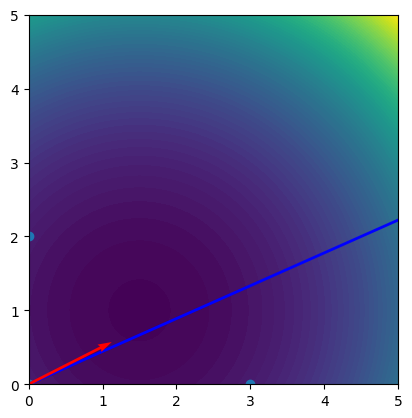

In [3]:
import numpy as np


def f(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> float:
    assert adj_i.shape == data_i.shape
    dist = np.linalg.norm(pos[i] - pos[adj_i])
    return np.sum(data_i * (dist**3) / (3 * k))


def gradient(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> np.ndarray:
    assert adj_i.shape == data_i.shape
    delta = pos[i] - pos[adj_i]
    dist = np.linalg.norm(delta, axis=1)
    return np.sum((data_i * dist / k)[:, np.newaxis] * delta, axis=0)


def hessian(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> np.ndarray:
    assert adj_i.shape == data_i.shape
    delta = pos[i] - pos[adj_i]
    dist = np.linalg.norm(delta, axis=1)
    assert np.allclose(
        np.einsum("ij,ik->jk", (data_i / (k * dist))[:, np.newaxis] * delta, delta),
        (data_i[0] / (k * dist[0])) * np.outer(delta[0], delta[0])
        + (data_i[1] / (k * dist[1])) * np.outer(delta[1], delta[1]),
    )
    return np.sum(data_i * dist / k) * np.eye(2) + np.einsum(
        "ij,ik->jk", (data_i / (k * dist))[:, np.newaxis] * delta, delta
    )


k = 1.0
pos = np.array([[0.0, 0.0], [+3.0, +0.0], [+0.0, +2.0]])
adj = [[1, 2], [0], [0]]
data = [[1.0, 1.0], [1.0], [1.0]]
adj = list(map(lambda x: np.array(x, dtype=int), adj))
data = list(map(np.array, data))

i = 0
print("f:")
print(f(pos, i, adj[i], data[i], k))
print("gradient:")
print(gradient(pos, i, adj[i], data[i], k))
print("hessian:")
print(hessian(pos, i, adj[i], data[i], k))

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect("equal")

# draw f(x) with i=0
x = np.linspace(0, 5, 100)
ax.set_xlim(0, 5)
y = np.linspace(0, 5, 100)
ax.set_ylim(0, 5)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)

for x_idx in range(X.shape[0]):
    for y_idx in range(X.shape[1]):
        pos2 = np.array([[X[x_idx, y_idx], Y[x_idx, y_idx]]] + pos[1:].tolist())
        Z[x_idx, y_idx] = f(pos2, i, adj[i], data[i], k)

plt.contourf(X, Y, Z, levels=100, cmap="viridis")

plt.scatter(pos[:, 0], pos[:, 1])

# draw gradient from pos[i]
g = gradient(pos, i, adj[i], data[i], k)
plt.quiver(
    pos[i, 0],
    pos[i, 1],
    -100 * g[0],
    -100 * g[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="blue",
)

# draw Newton direction from pos[i]
hess = hessian(pos, i, adj[i], data[i], k)
assert np.all(np.linalg.eigvals(hess) > 0)
h = np.linalg.solve(hess, -g)
print(h)
plt.quiver(
    pos[i, 0],
    pos[i, 1],
    h[0],
    h[1],
    angles="xy",
    scale_units="xy",
    scale=1,
    color="red",
)

plt.show()

adj=[array([1, 2, 3, 4]), array([0, 2, 3, 4]), array([0, 1, 3, 4]), array([0, 1, 2, 4]), array([0, 1, 2, 3])] data=[array([1, 1, 1, 1]), array([1, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 0, 0, 0])]
f:
1.3333333333333333
gradient:
[0. 0.]
hessian:
[[6. 0.]
 [0. 6.]]
[1 2 3 4]
np.linalg.eigvals(hess)=array([6., 6.])
[-0.  0.]


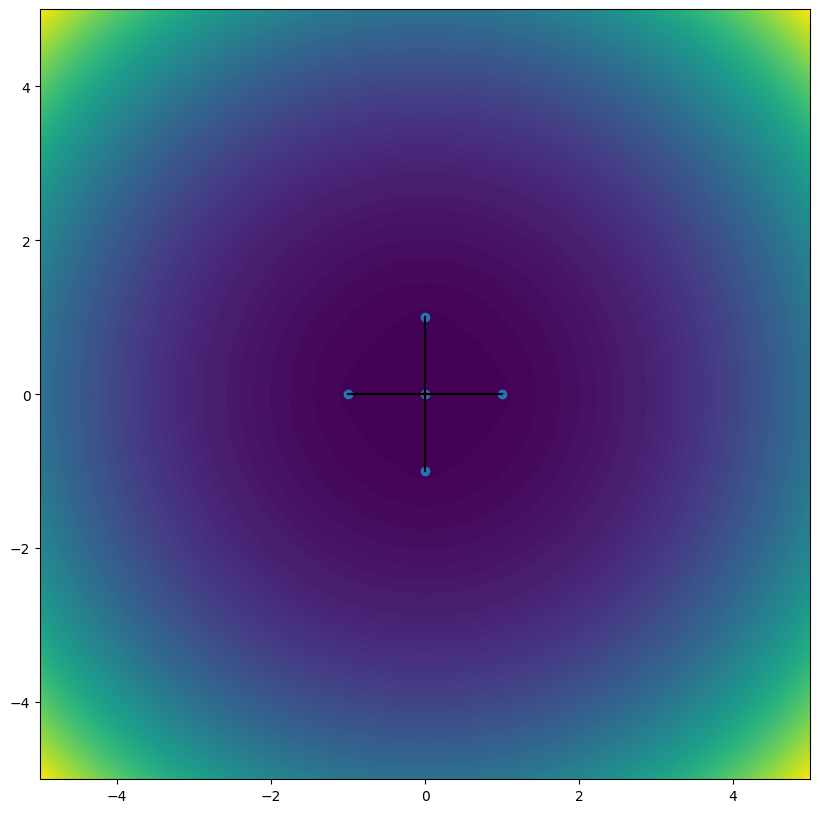

adj=[array([1, 2, 3, 4]), array([0, 2, 3, 4]), array([0, 1, 3, 4]), array([0, 1, 2, 4]), array([0, 1, 2, 3])] data=[array([1, 1, 1, 1]), array([1, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 0, 0, 0]), array([1, 0, 0, 0])]
f:
13.921500469030939
gradient:
[8.73620187 8.73620187]
hessian:
[[11.16763597  3.2075424 ]
 [ 3.2075424  11.16763597]]
[1 2 3 4]
np.linalg.eigvals(hess)=array([14.37517837,  7.96009357])
[-0.60772824 -0.60772824]


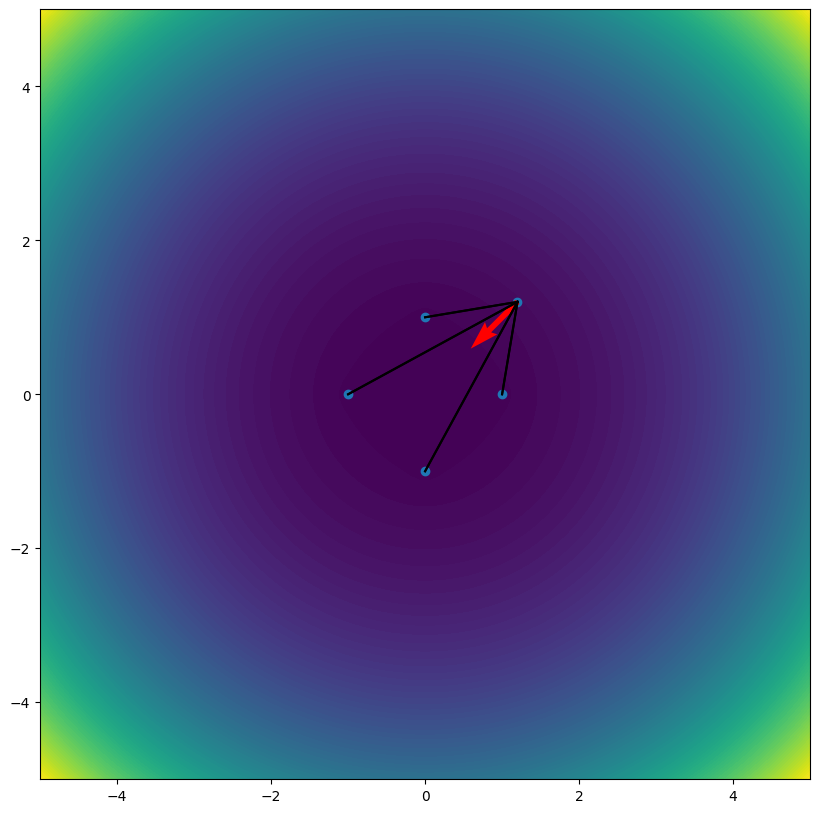

adj=[array([1, 2, 3, 4]), array([0, 2, 3, 4]), array([0, 1, 3, 4]), array([0, 1, 2, 4]), array([0, 1, 2, 3])] data=[array([1, 0, 0, 0]), array([1, 1, 1, 1]), array([0, 1, 0, 0]), array([0, 1, 0, 0]), array([0, 1, 0, 0])]
f:
-2.0412849625605434
gradient:
[6.94814616 0.        ]
hessian:
[[1.84094782 0.        ]
 [0.         1.15905218]]
[1 2 3 4]
np.linalg.eigvals(hess)=array([1.84094782, 1.15905218])
[-3.77422221  0.        ]


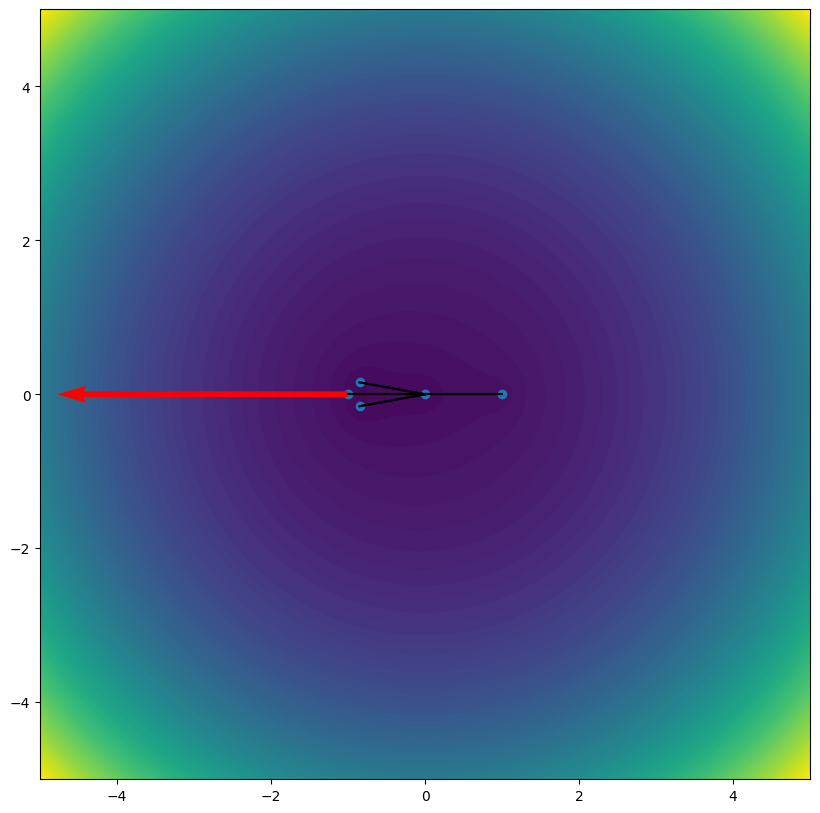

0/0/-1/0/0/1/0/-1/1/0/0/0/0,
1.2/1.2/-1/0/0/1/0/-1/1/0/0.592271758813887/0.592271758813887/0,
0/0/-1/0/-0.85/0.155/-0.85/-0.155/1/0/-4.774222211487155/0/0


In [84]:
import numpy as np


def f(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> float:
    assert adj_i.shape == data_i.shape
    dist = np.linalg.norm(pos[i] - pos[adj_i], axis=1)
    return np.sum(data_i * (dist**3) / (3 * k) + k * k * np.log(dist))


def gradient(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> np.ndarray:
    assert adj_i.shape == data_i.shape
    delta = pos[i] - pos[adj_i]
    dist = np.linalg.norm(delta, axis=1)
    return np.sum(
        (data_i * dist / k - k * k / (dist**2))[:, np.newaxis] * delta, axis=0
    )


def hessian(
    pos: np.ndarray, i: int, adj_i: np.ndarray, data_i: np.ndarray, k: float
) -> np.ndarray:
    assert adj_i.shape == data_i.shape
    delta = pos[i] - pos[adj_i]
    dist = np.linalg.norm(delta, axis=1)
    return np.sum(data_i * dist / k - k * k / (dist**2)) * np.eye(2) + np.einsum(
        "ij,ik->jk",
        (data_i / (k * dist) + 2 * k * k / (dist**4))[:, np.newaxis] * delta,
        delta,
    )


forLatex = ""

for mode in range(3):
    # for mode in [2]:
    k = 1
    if mode == 0:
        pos = np.array(
            [[0.0, 0.0], [-1.0, +0.0], [+0.0, +1.0], [+0.0, -1.0], [+1.0, 0.0]]
        )
        _adj = [[1, 2, 3, 4], [0], [0], [0], [0]]
        _data = [[1, 1, 1, 1], [1], [1], [1], [1]]
    elif mode == 1:
        pos = np.array([[1.2, 1.2], [-1.0, 0.0], [0.0, +1.0], [0.0, -1.0], [+1.0, 0.0]])
        _adj = [[1, 2, 3, 4], [0], [0], [0], [0]]
        _data = [[1, 1, 1, 1], [1], [1], [1], [1]]
    elif mode == 2:
        dx = 0.15
        dy = 0.155
        pos = np.array(
            [[-1.0, 0.0], [0.0, 0.0], [-1 + dx, +dy], [-1 + dx, -dy], [+1.0, 0.0]]
        )
        _adj = [[1], [0, 2, 3, 4], [1], [1], [1]]
        _data = [[1], [1, 1, 1, 1], [1], [1], [1]]

    n = len(pos)
    adj = [list(range(n)) for _ in range(n)]
    data = [[0 for _ in range(n)] for _ in range(n)]
    for i in range(n):
        for j, d in zip(_adj[i], _data[i]):
            data[i][j] = d
    for i in range(n):
        adj[i].pop(i)
        data[i].pop(i)
    adj = list(map(lambda x: np.array(x, dtype=int), adj))
    data = list(map(np.array, data))
    print(f"{adj=} {data=}")

    v = 0
    print("f:")
    print(f(pos, v, adj[v], data[v], k))
    print("gradient:")
    print(gradient(pos, v, adj[v], data[v], k))
    print("hessian:")
    print(hessian(pos, v, adj[v], data[v], k))

    import matplotlib.pyplot as plt

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    ax.set_aspect("equal")

    # draw f(x) with i=0
    sz = 5
    x = np.linspace(-sz, sz, 100)
    ax.set_xlim(-sz, sz)
    y = np.linspace(-sz, sz, 100)
    ax.set_ylim(-sz, sz)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    print(adj[v])
    for x_idx in range(X.shape[0]):
        for y_idx in range(X.shape[1]):
            pos2 = np.copy(pos)
            pos2[v] = np.array([X[x_idx, y_idx], Y[x_idx, y_idx]])
            Z[x_idx, y_idx] = f(pos2, v, adj[v], data[v], k)

    plt.contourf(X, Y, Z, levels=100, cmap="viridis")

    plt.scatter(pos[:, 0], pos[:, 1])

    for i in range(len(pos)):
        for j in _adj[i]:
            plt.plot([pos[i, 0], pos[j, 0]], [pos[i, 1], pos[j, 1]], color="black")

    # draw gradient from pos[v]
    g = gradient(pos, v, adj[v], data[v], k)
    # plt.quiver(
    #     pos[v, 0],
    #     pos[v, 1],
    #     -100 * g[0],
    #     -100 * g[1],
    #     angles="xy",
    #     scale_units="xy",
    #     scale=1,
    #     color="blue",
    # )

    # draw Newton direction from pos[v]
    hess = hessian(pos, v, adj[v], data[v], k)
    print(f"{np.linalg.eigvals(hess)=}")
    assert np.all(np.linalg.eigvals(hess) > 0)
    h = np.linalg.solve(hess, -g)
    print(h)
    plt.quiver(
        pos[v, 0],
        pos[v, 1],
        h[0],
        h[1],
        angles="xy",
        scale_units="xy",
        scale=1,
        color="red",
    )

    if mode <= 1:
        forLatex += f"{pos[0][0]}/{pos[0][1]}/{pos[1][0]}/{pos[1][1]}/{pos[2][0]}/{pos[2][1]}/{pos[3][0]}/{pos[3][1]}/{pos[4][0]}/{pos[4][1]}/{pos[v][0]+h[0]}/{pos[v][1]+h[1]}/0,\n"
    else:
        forLatex += f"{pos[1][0]}/{pos[1][1]}/{pos[0][0]}/{pos[0][1]}/{pos[2][0]}/{pos[2][1]}/{pos[3][0]}/{pos[3][1]}/{pos[4][0]}/{pos[4][1]}/{pos[v][0]+h[0]}/{pos[v][1]+h[1]}/0,\n"

    plt.show()


forLatex = forLatex.replace(".0/", "/")
print(forLatex[:-2])